# Lojistik Regresyon

- İkili sonucu olan ikili değişkenleri modellemek için lojistik regresyon kullanılır. İkili vaka modellerinde
  sonuç tipik olarak 0 veya 1'dir
- Amaç, sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi açıklayan
  matematiksel bir model oluşturmaktır.

## Lojistik Regresyon - Diabet Tahmin Modeli
Bir hasta geldiğinde bu hastanın şeker hastası olup olmadığını tahmin edilebilecek bir makine öğrenmesi modeli geliştirmek.
- Kişilerin çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışaca
    

#### Kullanılan Kütüphaneler

In [35]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm #statistical models (including regression)
import seaborn as sns #visualization
from sklearn.preprocessing import scale #data normalization
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict #model selection
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss #model evaluation
from sklearn.metrics import roc_auc_score,roc_curve #model evaluation
import matplotlib.pyplot as plt #visualization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.svm import SVC #SVM



from warnings import filterwarnings #uyarıları kapatmak için
filterwarnings('ignore') #uyarıları kapatmak için




Bir hasta geldiğinde bu hastanın şeker hastası olup olmadığını tahmin edilebilecek bir makine öğrenmesi modeli geliştirmek.
- Kişilerin çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışaca
    - Bu durumlar gözlemlendiğinde Outcome bağımlı değişkeni 1 ise şeker hastası 0 ise şeker hastası olmadığını tahmin edebilmek
- Outcome kategorik bir değişkendir

## Model Oluşturma

In [36]:
diabetes = pd.read_csv("diabetes.csv") #veri seti okundu
df = diabetes.copy() #veri seti kopyalandı
df = df.dropna() # eksik gözlemler silindi
df.head() #ilk 5 gözlem gösterildi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.info() #veri seti hakkında bilgi verildi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
df["Outcome"].value_counts() #Outcome değişkeninin sınıflarının sayıları	

0    500
1    268
Name: Outcome, dtype: int64

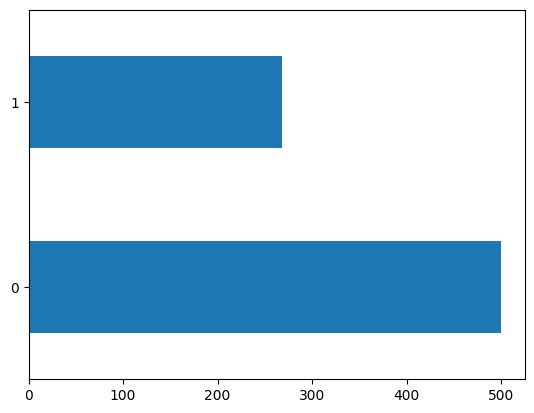

In [39]:
df["Outcome"].value_counts().plot.barh(); #Outcome değişkeninin sınıf dağılımı gösterildi

In [40]:
df.describe().T #veri seti hakkında istatistiksel bilgiler verildi

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
y = df["Outcome"] #bağımlı değişken
X = df.drop(["Outcome"], axis = 1) #bağımsız değişkenler


# Stats Model Oluşturma

In [42]:
loj = sm.Logit(y, X) #lojistik regresyon modeli oluşturuldu
loj_model = loj.fit() #model eğitildi
loj_model.summary() #model özet bilgileri verildi

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                 0.05922
Time:                        14:39:57   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

# Scikit - Learn Regresyon Modeli Oluşturma

In [43]:
from sklearn.linear_model import LogisticRegression #lojistik regresyon modeli
loj = LogisticRegression(solver = "liblinear") #lojistik regresyon modeli
loj_model = loj.fit(X, y) #model eğitildi
loj_model #model özet bilgileri verildi

LogisticRegression(solver='liblinear')

In [44]:
loj_model.intercept_ #modelin sabiti

array([-5.87553575])

In [45]:
loj_model.coef_ #modelin katsayıları

array([[ 1.17012910e-01,  2.83439995e-02, -1.69141528e-02,
         7.57716409e-04, -6.38967904e-04,  5.95854629e-02,
         6.74786680e-01,  7.19201366e-03]])

# Tahmin Model Ayarlama

In [46]:
y_pred = loj_model.predict(X) #model tahminleri

In [47]:
confusion_matrix(y, y_pred) #modelin karışıklık matrisi

array([[448,  52],
       [121, 147]], dtype=int64)

In [48]:
accuracy_score(y, y_pred) #modelin doğruluk oranı

0.7747395833333334

- Recall: Pozitif sınıfın (1) doğru tahmin edilme oranıdır. Tahmin edilen pozitif sınıfların ne kadarının doğru tahmin edildiğini gösterir. 2. tip hata ile
  ilgilenir. Gözden kaçırmaların maliyeti hakkında bilgi verdiğinden önemli bir ölçüdür. Gerçekleri yakalama başarısına odaklanır. Hesaplamak için
  TP/(TP+FN) formülü kullanılır.
- F1 Score: Precision ve recall değerlerinin harmonik ortalamasıdır. Hem Precision hem de Recall değerinin etkisini tutmaktadır. Hesaplamak için
  2*(Precision*Recall)/(Precision+Recall) formülü kullanılır

In [49]:
print(classification_report(y, y_pred)) #modelin sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [50]:
loj_model.predict(X)[0:5] #modelin ilk 5 tahmini

array([1, 0, 1, 0, 1], dtype=int64)

- İlk 5 değer makine tahmini

In [51]:
loj_model.predict_proba(X)[0:5] #modelin ilk 5 tahmininin olasılık değerleri , ilgilenen olasıklar 2. sütun

array([[0.35093811, 0.64906189],
       [0.91674089, 0.08325911],
       [0.22496628, 0.77503372],
       [0.92105754, 0.07894246],
       [0.16804013, 0.83195987]])

- ilk 5 değer gerçek değerler

In [52]:
y[0:5] #gerçek değerler

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [53]:
y_probs = loj_model.predict_proba(X) #modelin tahminlerinin olasılık değerleri
y_probs = y_probs[:,1] #ilgilenen olasıklar 2. sütun

- ilk 5 değer olasılık değerleri (düzenlenmiş)

In [54]:
y_probs[0:5] #modelin ilk 5 tahmininin olasılık değerleri

array([0.64906189, 0.08325911, 0.77503372, 0.07894246, 0.83195987])

In [55]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs] #modelin tahminleri

- ilk 5 değerin tahminleri (düzenlenmiş model)

In [56]:
y_pred[0:5] #modelin ilk 5 tahmini , önceki değerler ile karşılaştır

[1, 0, 1, 0, 1]

In [57]:
confusion_matrix(y, y_pred) #modelin karışıklık matrisi


array([[448,  52],
       [121, 147]], dtype=int64)

- Modelin doğruluk skoru 

In [58]:
accuracy_score(y, y_pred) #modelin doğruluk oranı

0.7747395833333334

In [60]:
print(classification_report(y, y_pred)) #modelin sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [61]:
loj_model.predict_proba(X)[:,1][0:5] #modelin ilk 5 tahmininin olasılık değerleri  

array([0.64906189, 0.08325911, 0.77503372, 0.07894246, 0.83195987])

#### Lojistik Regresyon - Roc Curve Metriği

![roc_curve.jpg](roc_curve.jpg)

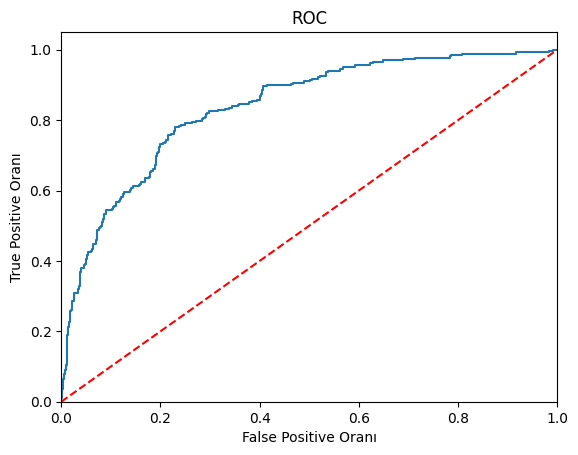

In [62]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X)) #modelin ROC değeri

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1]) #modelin ROC eğrisi
plt.figure() #grafik oluşturuldu
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc) #grafik çizildi
plt.plot([0, 1], [0, 1],'r--') #grafik çizildi
plt.xlim([0.0, 1.0]) #grafik çizildi
plt.ylim([0.0, 1.05]) #grafik çizildi
plt.xlabel('False Positive Oranı') #grafik çizildi
plt.ylabel('True Positive Oranı') #grafik çizildi
plt.title('ROC') #grafik çizildi
plt.show() #grafik gösterildi

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 42) #veri seti train ve test olarak bölündü


In [64]:
loj = LogisticRegression(solver = "liblinear") #lojistik regresyon modeli oluşturuldu
loj_model = loj.fit(X_train,y_train) #model eğitildi
loj_model #model özet bilgileri verildi

LogisticRegression(solver='liblinear')

#### Modelin doğruluk oranı train ve test data

In [65]:
accuracy_score(y_test, loj_model.predict(X_test)) #modelin doğruluk oranı , train ve test veri seti kullanılarak

0.7532467532467533

In [66]:
cross_val_score(loj_model, X_test, y_test, cv = 5).mean() #modelin doğruluk oranı, 5 katlı çapraz doğrulama kullanıldı

0.7748381128584644